# Data Exploration
This notebook contains the code for the fourth part of this data science project - data exploration. Section headings have been included for convenience and the full writeup is available [on my website](https://www.pineconedata.com/2024-06-28-basketball-data-exploration/).

## Project Overview
This is part of a series that walks through the entire process of a data science project - from initial steps like data acquisition, preprocessing, and cleaning to more advanced steps like feature engineering, creating visualizations, and machine learning. The dataset used in this project contains individual basketball player statistics (such as total points scored and blocks made) for the 2023-2024 NCAA women’s basketball season.

### Articles in this Series   
1. [Acquiring and Combining the Datasets](https://www.pineconedata.com/2024-04-11-basketball-data-acquisition/)
2. [Cleaning and Preprocessing the Data](https://www.pineconedata.com/2024-05-02-basketball-data-cleaning-preprocessing/)
3. [Engineering New Features](https://www.pineconedata.com/2024-05-30-basketball-feature_engineering/)
4. [Exploratory Data Analysis](https://www.pineconedata.com/2024-06-28-basketball-data-exploration/) (This Notebook)
5. [Visualizations, Charts, and Graphs](https://www.pineconedata.com/2024-07-29-basketball-visualizations/)
6. [Selecting a Machine Learning Model](https://www.pineconedata.com/2024-08-12-basketball-select-ml-ols/)
7. [Training the Machine Learning Model](https://www.pineconedata.com/2024-09-13-basketball-train-ols/)
8. [Evaluating the Machine Learning Model](https://www.pineconedata.com/2024-11-27-basketball-evaluate-ols-model/)


# Getting Started
Full requirements and environment setup information is detailed in the [first article of this series](https://www.pineconedata.com/2024-04-11-basketball-data-acquisition/).

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [2]:
pio.renderers.default = 'iframe'

## Import Data

In [3]:
from pathlib import Path


data_folder = Path.cwd().parent / 'data'

In [4]:
player_data = pd.read_excel(data_folder / 'player_data_engineered.xlsx')
player_data.head()

PLAYER_NAME                           Team      Class  Height  \
0      Kiara Jackson           UNLV (Mountain West)     Junior      67   
1      Raven Johnson           South Carolina (SEC)  Sophomore      68   
2        Gina Marxen              Montana (Big Sky)     Senior      68   
3  McKenna Hofschild   Colorado St. (Mountain West)     Senior      62   
4        Kaylah Ivey           Boston College (ACC)     Junior      68   

  Position      PLAYER_ID       TEAM_NAME  GAMES  MINUTES_PLAYED  \
0    Guard  ncaaw.p.67149            UNLV     29             895   
1    Guard  ncaaw.p.67515  South Carolina     30             823   
2    Guard  ncaaw.p.57909         Montana     29             778   
3    Guard  ncaaw.p.60402    Colorado St.     29            1046   
4    Guard  ncaaw.p.64531    Boston Coll.     33             995   

   FIELD_GOALS_MADE  ...     Conference  MINUTES_PER_GAME  FOULS_PER_GAME  \
0               128  ...  Mountain West         30.862069        1.620690   
1                98  ...            SEC         27.433333        1.133333   
2                88  ...        Big Sky         26.827586        0.896552   
3               231  ...  Mountain West         36.068966        1.172414   
4                47  ...            ACC         30.151515        1.454545   

   POINTS_PER_GAME  ASSISTS_PER_GAME  STEALS_PER_GAME  BLOCKS_PER_GAME  \
0        11.137931          4.655172         1.068966         0.172414   
1         8.100000          4.933333         2.000000         0.166667   
2        10.241379          3.827586         0.551724         0.068966   
3        22.551724          7.275862         1.241379         0.137931   
4         4.333333          5.636364         1.090909         0.030303   

   REBOUNDS_PER_GAME  ASSIST_TO_TURNOVER  FANTASY_POINTS  
0           4.448276            3.214286           710.3  
1           5.366667            2.792453           735.2  
2           2.068966            2.921053           533.5  
3           3.965517            2.971831          1117.5  
4           1.727273            2.906250           500.4  

[5 rows x 40 columns]

# Identify Relationships between Variables

## Describe the Dataset

In [5]:
player_data.describe()

Height       GAMES  MINUTES_PLAYED  FIELD_GOALS_MADE  \
count  895.000000  895.000000      895.000000        895.000000   
mean    70.637989   29.410056      842.487151        121.556425   
std      3.447385    2.157788      160.258745         46.937734   
min     62.000000   18.000000      223.000000         21.000000   
25%     68.000000   29.000000      749.000000         90.000000   
50%     71.000000   30.000000      860.000000        119.000000   
75%     73.000000   31.000000      963.000000        151.000000   
max     80.000000   34.000000     1230.000000        332.000000   

       FIELD_GOAL_ATTEMPTS  FIELD_GOAL_PERCENTAGE  THREE_POINTS_MADE  \
count           895.000000             895.000000         895.000000   
mean            280.181006              43.476872          27.201117   
std             100.900579               6.988811          24.518445   
min              42.000000              22.600000           0.000000   
25%             209.500000              38.750000           4.000000   
50%             278.000000              42.800000          23.000000   
75%             345.500000              47.500000          44.000000   
max             719.000000              66.700000         168.000000   

       THREE_POINT_ATTEMPTS  THREE_POINT_PERCENTAGE  FREE_THROWS_MADE  ...  \
count            895.000000              838.000000        895.000000  ...   
mean              81.974302               28.865632         62.810056  ...   
std               66.535506               12.261968         33.864345  ...   
min                0.000000                0.000000          3.000000  ...   
25%               19.000000               24.700000         38.000000  ...   
50%               75.000000               31.400000         57.000000  ...   
75%              130.000000               36.175000         83.000000  ...   
max              437.000000              100.000000        203.000000  ...   

       TWO_POINT_PERCENTAGE  MINUTES_PER_GAME  FOULS_PER_GAME  \
count            895.000000        895.000000      895.000000   
mean              47.135772         28.632719        2.216569   
std                7.324183          4.979118        0.592112   
min               23.255814          8.259259        0.413793   
25%               42.396491         26.036376        1.800000   
50%               46.953405         29.354839        2.200000   
75%               51.695172         32.033333        2.636667   
max               68.224299         38.437500        3.781250   

       POINTS_PER_GAME  ASSISTS_PER_GAME  STEALS_PER_GAME  BLOCKS_PER_GAME  \
count       895.000000        895.000000       895.000000       895.000000   
mean         11.322390          2.332290         1.299531         0.589494   
std           4.264700          1.360937         0.614957         0.586036   
min           1.766667          0.043478         0.096774         0.000000   
25%           8.349833          1.254032         0.836022         0.148148   
50%          11.275862          2.093750         1.233333         0.375000   
75%          14.149554          3.212862         1.666667         0.933333   
max          31.875000          8.812500         4.677419         3.433333   

       REBOUNDS_PER_GAME  ASSIST_TO_TURNOVER  FANTASY_POINTS  
count         895.000000          895.000000      895.000000  
mean            5.212652            1.058032      664.912737  
std             2.234345            0.567813      184.542673  
min             1.294118            0.040000      189.900000  
25%             3.419355            0.643346      544.650000  
50%             4.766667            0.967742      651.100000  
75%             6.894704            1.361034      774.250000  
max            15.312500            3.214286     1716.800000  

[8 rows x 33 columns]

## Feature Selection

In [6]:
player_data[['PLAYER_NAME', 'TWO_POINTS_MADE', 'TWO_POINT_ATTEMPTS', 'TWO_POINT_PERCENTAGE']].head()

PLAYER_NAME  TWO_POINTS_MADE  TWO_POINT_ATTEMPTS  \
0      Kiara Jackson              100                 222   
1      Raven Johnson               78                 157   
2        Gina Marxen               30                  79   
3  McKenna Hofschild              176                 360   
4        Kaylah Ivey               15                  55   

   TWO_POINT_PERCENTAGE  
0             45.045045  
1             49.681529  
2             37.974684  
3             48.888889  
4             27.272727

In [7]:
numerical_columns = ['Height', 'MINUTES_PLAYED', 'FIELD_GOALS_MADE', 
                     'THREE_POINTS_MADE', 'TWO_POINTS_MADE', 'FREE_THROWS_MADE',
                     'TOTAL_REBOUNDS', 'ASSISTS', 'TURNOVERS', 
                     'STEALS', 'BLOCKS', 'FOULS', 'POINTS', 'FANTASY_POINTS']

## Correlation vs Causation

## Generate Correlation Matrix

### Correlation Matrix of Two Features

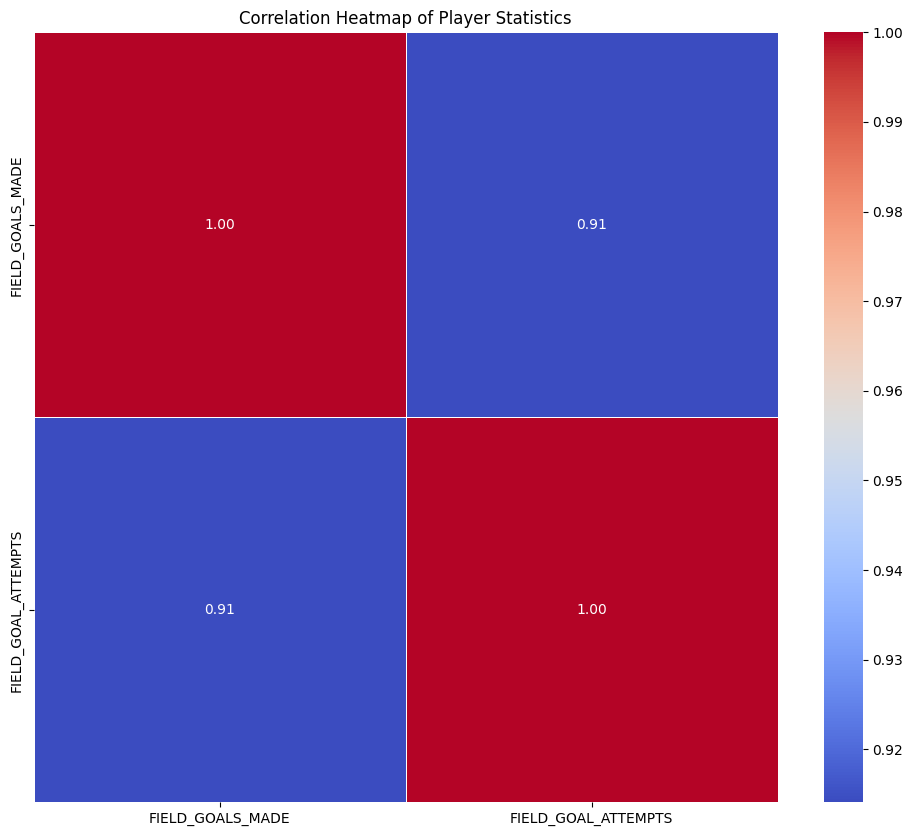

In [8]:
plt.figure(figsize=(12, 10))
correlation_matrix = player_data[['FIELD_GOALS_MADE', 'FIELD_GOAL_ATTEMPTS']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Player Statistics')
plt.show()

### Correlation Matrix of Four Features

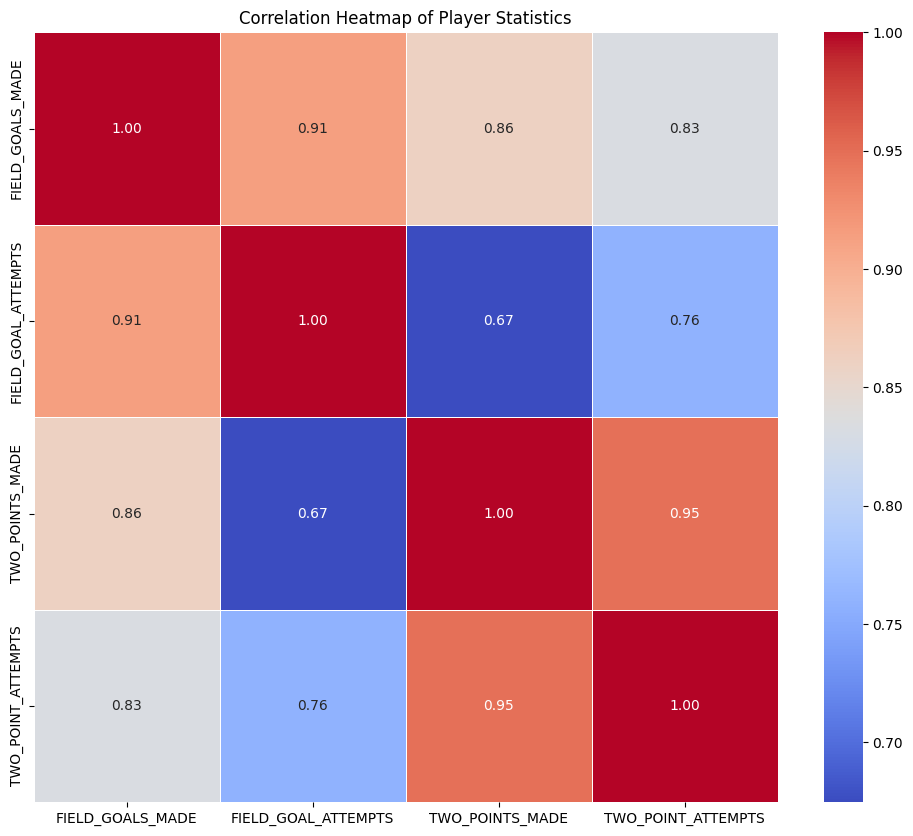

In [9]:
plt.figure(figsize=(12, 10))
correlation_matrix = player_data[['FIELD_GOALS_MADE', 'FIELD_GOAL_ATTEMPTS', 'TWO_POINTS_MADE', 'TWO_POINT_ATTEMPTS']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Player Statistics')
plt.show()

### Correlation Matrix of All Selected Features

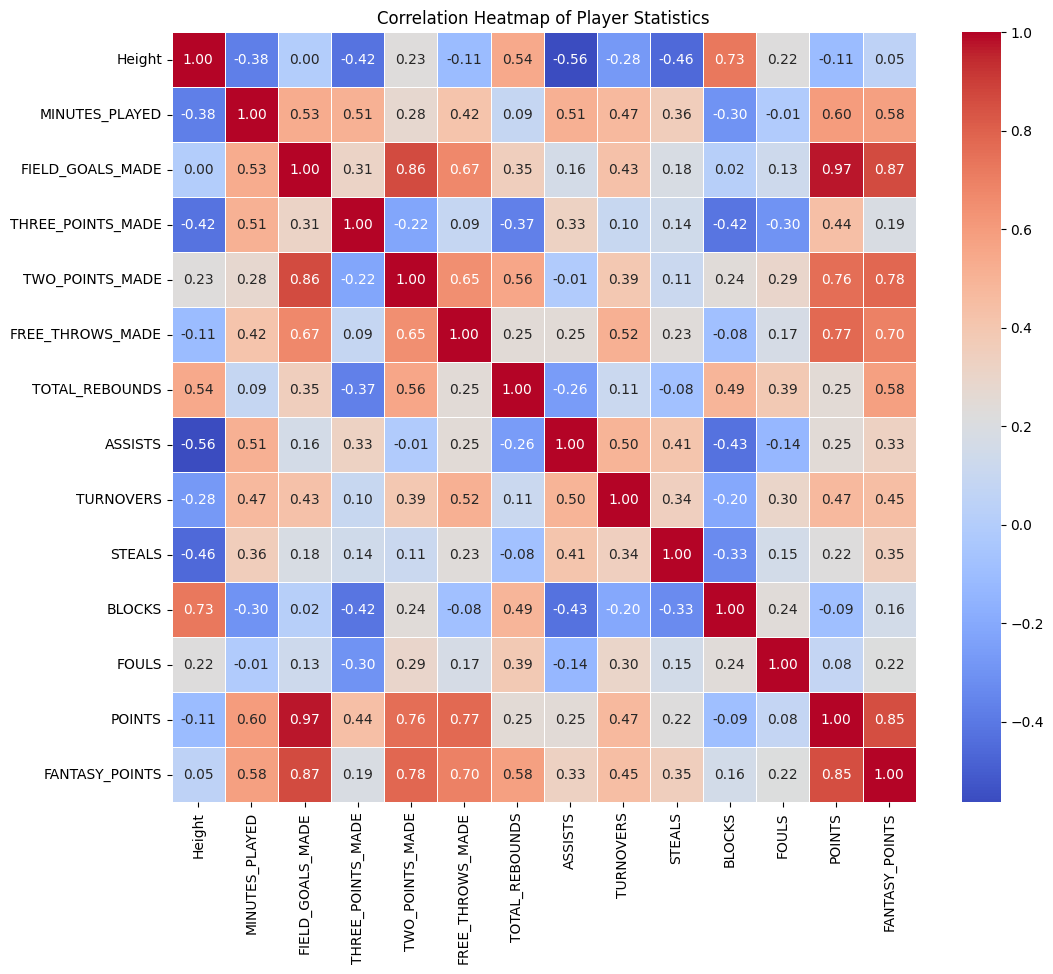

In [10]:
correlation_matrix = player_data[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Player Statistics')
plt.show()

## Generate Scatterplot Matrix

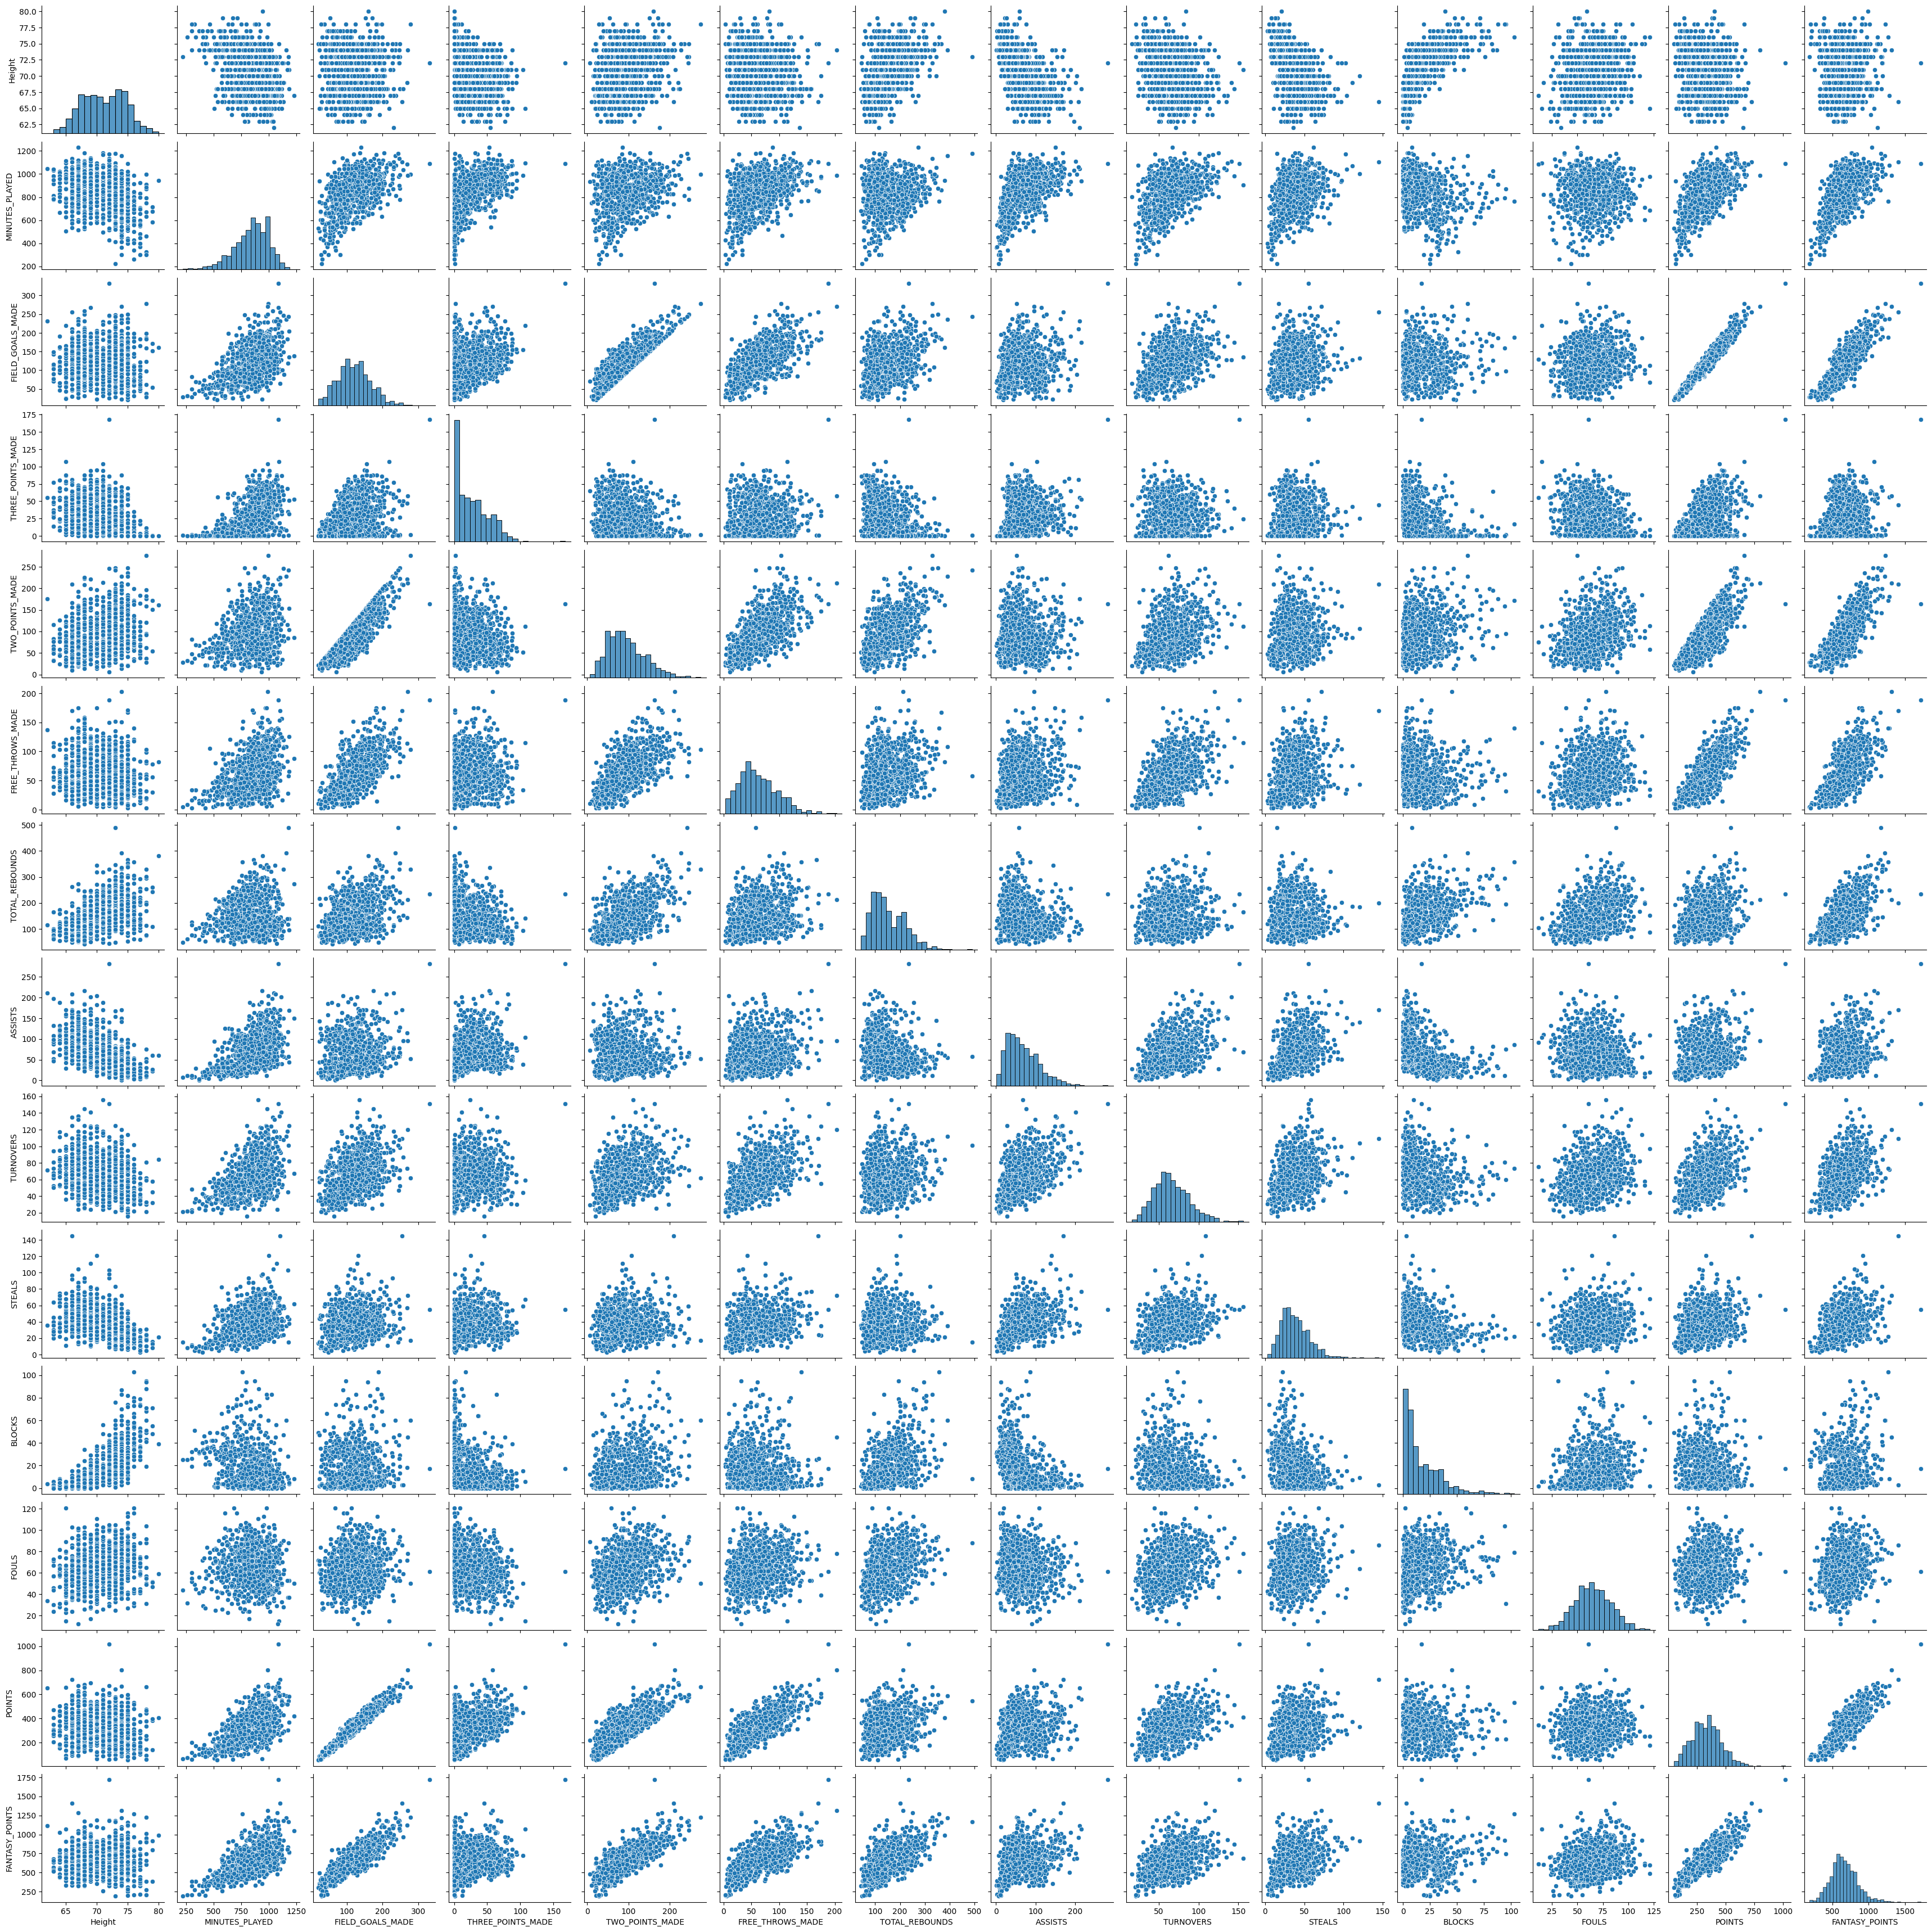

In [11]:
sns.pairplot(player_data[numerical_columns])
plt.show()